In [ ]:

#Aqui importamos el modulo para poder cargar archivos en Google colab y cargamos el archivo CSV
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full (2).csv


In [ ]:
# Dataset:
#Los datos están relacionados con campañas de marketing directo de una institución bancaria portuguesa. Las campañas
# de marketing se basaron en llamadas telefónicas. Muchas veces era necesario más de un contacto con un mismo cliente,
# para poder acceder si el producto (depósito a plazo bancario) estaría ('sí') o no ('no') suscrito.
#
# Objetivo:
# Este proyecto busca construir un modelo de aprendizaje automático capaz de predecir si un cliente de un banco
# se suscribirá o no a un depósito a plazo. Para lograr esto, se utilizará un conjunto de datos con información
# demográfica y financiera de los clientes del banco.
#
# Modelo Implementado:
# Se implementará un modelo de Árbol de Decisión por su capacidad para manejar variables categóricas y numéricas,
# así como su interpretabilidad.



In [ ]:
# Importamos pandas y leemos el archivo CSV en un DataFrame\import pandas as pd
import pandas as pd
df = pd.read_csv('bank-full.csv', delimiter=';')
print(df.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [ ]:
# Mapeamos los valores de la columna 'y' a valores numéricos (1 para 'yes', 0 para 'no')
df['y'] = df['y'].map({'yes': 1, 'no': 0})
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [ ]:
# Verificamos si hay valores nulos en el DataFrame e imprimimos la cantidad de valores faltantes
print(df.isna().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
# Calculamos y contamos la cantidad de ceros (no suscripciones) y unos (suscripciones) en la columna 'y' e imprimimos los resultados del conteo
cantidad_ceros = (df['y'] == 0).sum()
cantidad_unos = (df['y'] == 1).sum()

# Imprimimos los resultados
print(f"Cantidad de ceros en 'y': {cantidad_ceros}")
print(f"Cantidad de unos en 'y': {cantidad_unos}")

Cantidad de ceros en 'y': 39922
Cantidad de unos en 'y': 5289


In [ ]:
# Separamos las características (X) y el objetivo (y) del DataFrame
x = df.drop('y', axis=1).copy()
y = df.y.copy()


In [ ]:
# Dividimos los datos en conjuntos de entrenamiento y prueba. Utilizamos estratificación para mantener la distribución de la clase
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
y_test

,y
37735,1
44332,1
4432,0
38725,1
38581,0
...,...
15913,0
20622,1
41684,0
32749,0


In [ ]:
# Codificamos variables categóricas con OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder(sparse_output= False).fit(X_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])

In [ ]:
# Aplicamos la codificación al conjunto de entrenamiento
encoded = ohe.transform(X_train[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])

In [ ]:
encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
# Creamos un DataFrame con las variables codificadas y mantener los índices originales
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded, index=X_train.index)

In [ ]:
# Concatenamos las columnas codificadas con las restantes del conjunto de entrenamiento
X_train = pd.concat([X_train, encoded_df], axis='columns')

In [ ]:
# Repetimos el proceso de codificación para el conjunto de prueba
enconded_test = ohe.transform(X_test[['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']])

In [ ]:
encoded_df_test = pd.DataFrame(columns=ohe.get_feature_names_out(), data=enconded_test, index=X_test.index)

In [ ]:
X_test = pd.concat([X_test, encoded_df_test], axis='columns')

In [ ]:
# Verificamos el DataFrame resultante del conjunto de entrenamiento tras la codificación
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
13382,31,services,married,secondary,no,1,yes,no,cellular,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32641,35,services,married,secondary,no,195,yes,no,cellular,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3991,24,blue-collar,single,secondary,no,77,yes,no,unknown,16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8068,35,blue-collar,married,secondary,no,80,yes,yes,unknown,2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27484,37,services,single,secondary,no,105,no,yes,cellular,21,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16952,45,blue-collar,married,secondary,no,79,yes,no,cellular,25,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6317,30,blue-collar,married,secondary,no,1196,no,no,unknown,27,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
34781,27,management,single,tertiary,no,2559,yes,no,cellular,6,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13679,32,housemaid,married,primary,no,0,yes,no,cellular,9,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Reimprimimos la distribución de etiquetas en el conjunto de prueba para validación final
y_test

,y
37735,1
44332,1
4432,0
38725,1
38581,0
...,...
15913,0
20622,1
41684,0
32749,0


In [ ]:
# Entrenamos un modelo de árbol de decisión con una profundidad máxima de 10
from sklearn.tree import DecisionTreeClassifier



In [ ]:
# Seleccionamos todas las características categóricas para la codificación
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# Creamos una instancia de OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # handle_unknown='ignore' para seguridad

In [ ]:
# Ajustamos y transformamos el codificador en los datos de entrenamiento
encoded_data_train = encoder.fit_transform(X_train[categorical_features])

In [ ]:
# Creamos un DataFrame con las características codificadas
encoded_df_train = pd.DataFrame(encoded_data_train, columns=encoder.get_feature_names_out(categorical_features), index=X_train.index)


In [ ]:
# Concatenamos las características codificadas con el DataFrame original
X_train_encoded = pd.concat([X_train.drop(categorical_features, axis=1), encoded_df_train], axis=1)


In [ ]:
# Repetimos el proceso para los datos de prueba
encoded_data_test = encoder.transform(X_test[categorical_features])
encoded_df_test = pd.DataFrame(encoded_data_test, columns=encoder.get_feature_names_out(categorical_features), index=X_test.index)
X_test_encoded = pd.concat([X_test.drop(categorical_features, axis=1), encoded_df_test], axis=1)


In [ ]:
# Ahora, entrenamos el modelo usando los datos codificados:
clf = DecisionTreeClassifier(max_depth=10, random_state=42).fit(X_train_encoded, y_train)


In [ ]:
# Realizamos predicciones en los conjuntos de entrenamiento y prueba
train_pred = clf.predict(X_train_encoded)
test_pred = clf.predict(X_test_encoded)

In [ ]:

train_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Evaluamos el modelo utilizando el informe de clasificación
from sklearn.metrics import classification_report

In [ ]:
# Imprimimos el informe de clasificación para el conjunto de entrenamiento
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     27945
           1       0.80      0.54      0.65      3702

    accuracy                           0.93     31647
   macro avg       0.87      0.76      0.80     31647
weighted avg       0.93      0.93      0.93     31647



In [ ]:
# Luego de aplicar un modelo de arbol de decisiones, obtuvimos un accuracy de 0.93, lo cual es muy
# aceptable debido a que el azar nos otorgaria una precision de un 87%.
# Al mismo tiempo tambien observamos que en la precision estan funcionando bastante parecidas ya que ninguna
# de las dos esta performando muy mal.

In [ ]:
# Imprimir el informe de clasificación para el conjunto de prueba
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11977
           1       0.61      0.41      0.49      1587

    accuracy                           0.90     13564
   macro avg       0.77      0.69      0.72     13564
weighted avg       0.89      0.90      0.89     13564



In [ ]:
# Observamos que el modelo cumple con la premisa de que va a bajar su performance al utilizar datos que no conoce,
# bajando a un accuracy de 0.90. Sin envargo esa tendencia no es tan distante.
# Tambien observamos que bajo bastante la precision en la clase minoritaria, lo cual es normal.

#


In [ ]:
################################################################################################################################################################################################

In [ ]:
# Graficos:
# Hipotesis nula
#
#
#
#

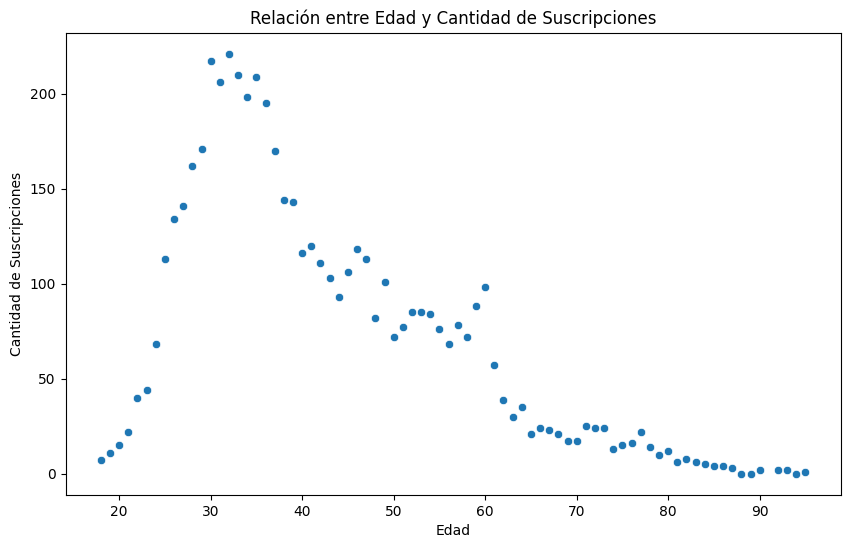

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

s
age_subscriptions = df.groupby('age')['y'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='y', data=age_subscriptions)
plt.title('Relación entre Edad y Cantidad de Suscripciones')
plt.xlabel('Edad')
plt.ylabel('Cantidad de Suscripciones')
plt.show()


In [ ]:
# H₀: No existe relación significativa entre la edad y la cantidad de suscriptores. Hipótesis alternativa (H₁):
# H1: Existe una relación significativa entre la edad y la cantidad de suscriptores."

# Basándonos en el análisis visual, rechazamos la hipótesis nula (H₀). Por lo tanto, concluimos que existe una relación significativa entre la edad y la cantidad de suscriptores.


# El gráfico muestra una tendencia clara, donde la mayor cantidad de suscriptores se encuentra en el rango de edad entre 30 y 40 años.
# Esto sugiere que este grupo demográfico tiene un interés particular para suscribirse y demuestra una relación importante entre la edad y la cantidad de suscriptores.
# Notamos un pico de suscripciones realizadas se encuentra en edades de 30 a 40 años. Es clave tener en cuenta esta informacion
# para ajustar y planificar futuras campañas de marketing, asi como tambien otras decisiones importantes.

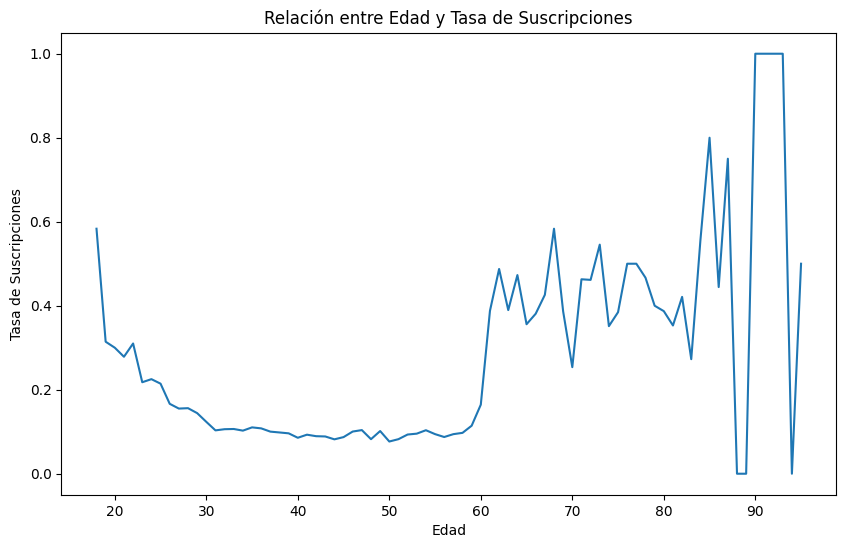

In [ ]:
import pandas as pd

# Agrupa por edad y calcula la tasa de suscripción
age_subscription_rate = df.groupby('age')['y'].mean().reset_index()

# Crea el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='y', data=age_subscription_rate)
plt.title('Relación entre Edad y Tasa de Suscripciones')
plt.xlabel('Edad')
plt.ylabel('Tasa de Suscripciones')
plt.show()

In [ ]:
# Sin embargo, en este grafico de lineas observamos que la mayor taza de suscripcin se encuentra en personas mayores de 60 años,
# teniendo su pico en los mayores de 90. Tambien puede ser que las personas mayores de 90 años con las que nos hemos comunicado
# sean muy pocas, y esas pocas hayas decidido suscribirse. Es importante tener en cuenta esta informacion para tomar decisiones a futuro.

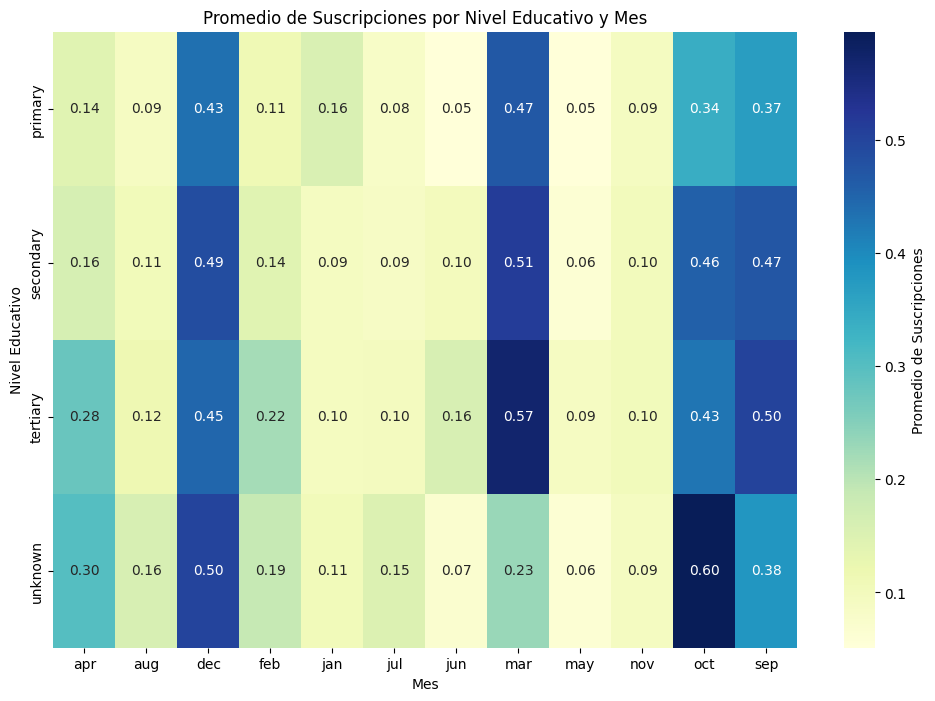

In [ ]:

import matplotlib.pyplot as plt


df['subscription'] = df['y']

education_month_avg = df.groupby(['education', 'month'])['subscription'].mean().unstack()


plt.figure(figsize=(12, 8))
sns.heatmap(education_month_avg, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Promedio de Suscripciones'})
plt.title("Promedio de Suscripciones por Nivel Educativo y Mes")
plt.xlabel("Mes")
plt.ylabel("Nivel Educativo")
plt.show()

In [ ]:
# En este mapa de calor podemos observar el promedio de suscripciones segmentado por el nivel educativos y los meses del año.
# Se observa que diciembre, marzo, octubre y septiembre son los meses donde se obtiene un mayor promedio de suscripciones.


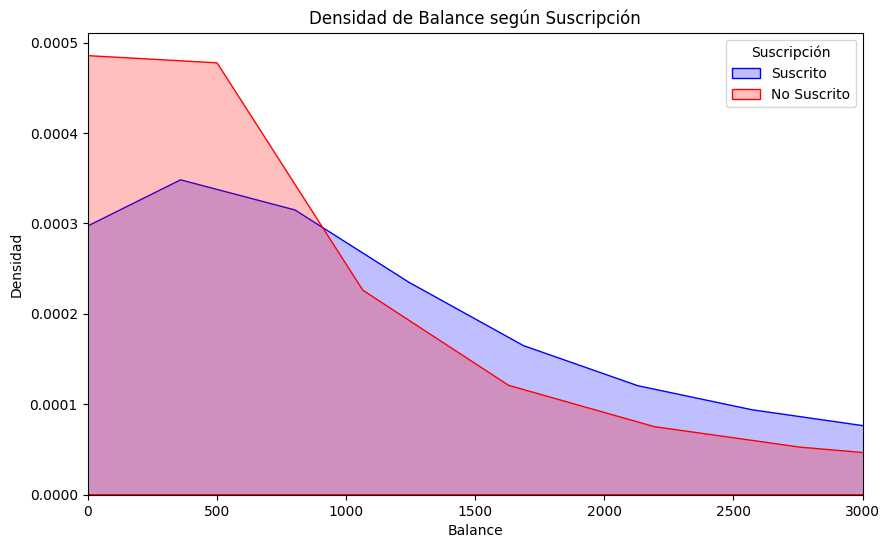

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Cambiamos "yes" y "no" a 1 y 0, respectivamente
sns.kdeplot(df[df["y"] == 1]["balance"], fill=True, label="Suscrito", color="blue")
sns.kdeplot(df[df["y"] == 0]["balance"], fill=True, label="No Suscrito", color="red")

plt.title("Densidad de Balance según Suscripción")
plt.xlabel("Balance")
plt.ylabel("Densidad")
plt.legend(title="Suscripción")

plt.xlim(0, 3000)

plt.show()

In [ ]:
# El gráfico de densidad nos muestra una relación clara entre el balance del cliente y su probabilidad de suscripción al depósito a plazo.
# Los clientes con mayor balance tienen una mayor probabilidad de suscribirse, lo que sugiere que el balance es un factor importante a
# considerar en estrategias de marketing y segmentación de clientes.


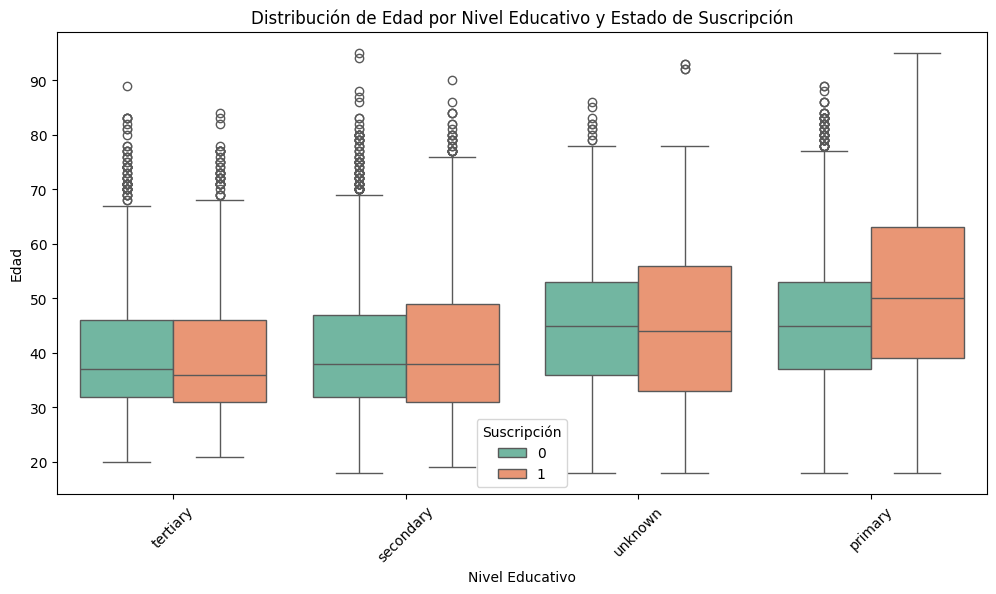

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="education", y="age", hue="y", palette="Set2")
plt.title("Distribución de Edad por Nivel Educativo y Estado de Suscripción")
plt.xlabel("Nivel Educativo")
plt.ylabel("Edad")
plt.legend(title="Suscripción")
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.show()

In [ ]:
# el diagrama de cajas nos muestra que la edad no es un predictor muy fuerte de la suscripción al depósito a plazo, pero el nivel educativo
# podría tener cierta influencia. La mayor variabilidad en el grupo de "desconocido" sugiere que obtener más información sobre el nivel
# educativo de estos clientes podría ser útil para mejorar la predicción.

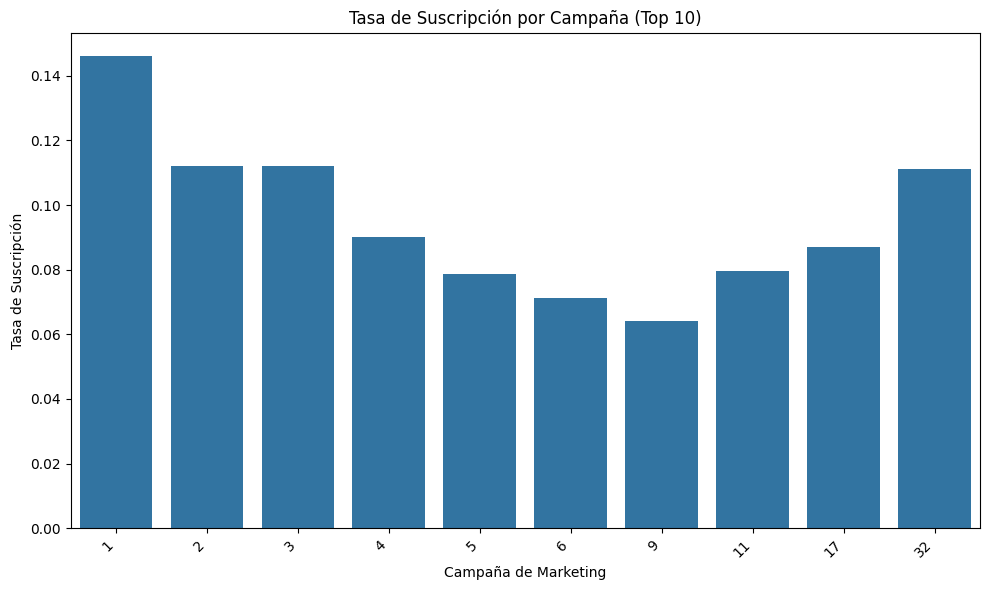

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcula la tasa de suscripción para cada campaña
campaign_subscription_rates = df.groupby('campaign')['subscription'].mean()

# Selecciona las 6 campañas con mayor tasa de suscripción
top_campaigns = campaign_subscription_rates.nlargest(10).index.tolist()

# Filtra el DataFrame para incluir solo las campañas principales
filtered_df = df[df['campaign'].isin(top_campaigns)]


# Agrupa por campaña y calcula la tasa de suscripción (sin edad)
campaign_avg = filtered_df.groupby('campaign')['subscription'].mean()


# Crea el gráfico de barras
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario
sns.barplot(x=campaign_avg.index, y=campaign_avg.values)
plt.title("Tasa de Suscripción por Campaña (Top 10)")
plt.xlabel("Campaña de Marketing")
plt.ylabel("Tasa de Suscripción")
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajusta el diseño para evitar que las etiquetas se superpongan
plt.show()

In [ ]:
# Este grafico de barras nos permite observar cuales fueron las campañas de marketing mas exitosas. Podemos ver que la campañas numero 1
# logro la mayor tasa de suscripcion llegando a 0.14. Luego la siguen las campañas 2, 3 y 32 con una tasa de suscripcion de 0.11.
# es importante tener en cuenta esta informacion al momento de crear futuras campañas de marketing.